# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import cost, Minuit

In [22]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'

## Data reader

In [23]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

[(0.0, 51.0), (0.0, 518.3226)]

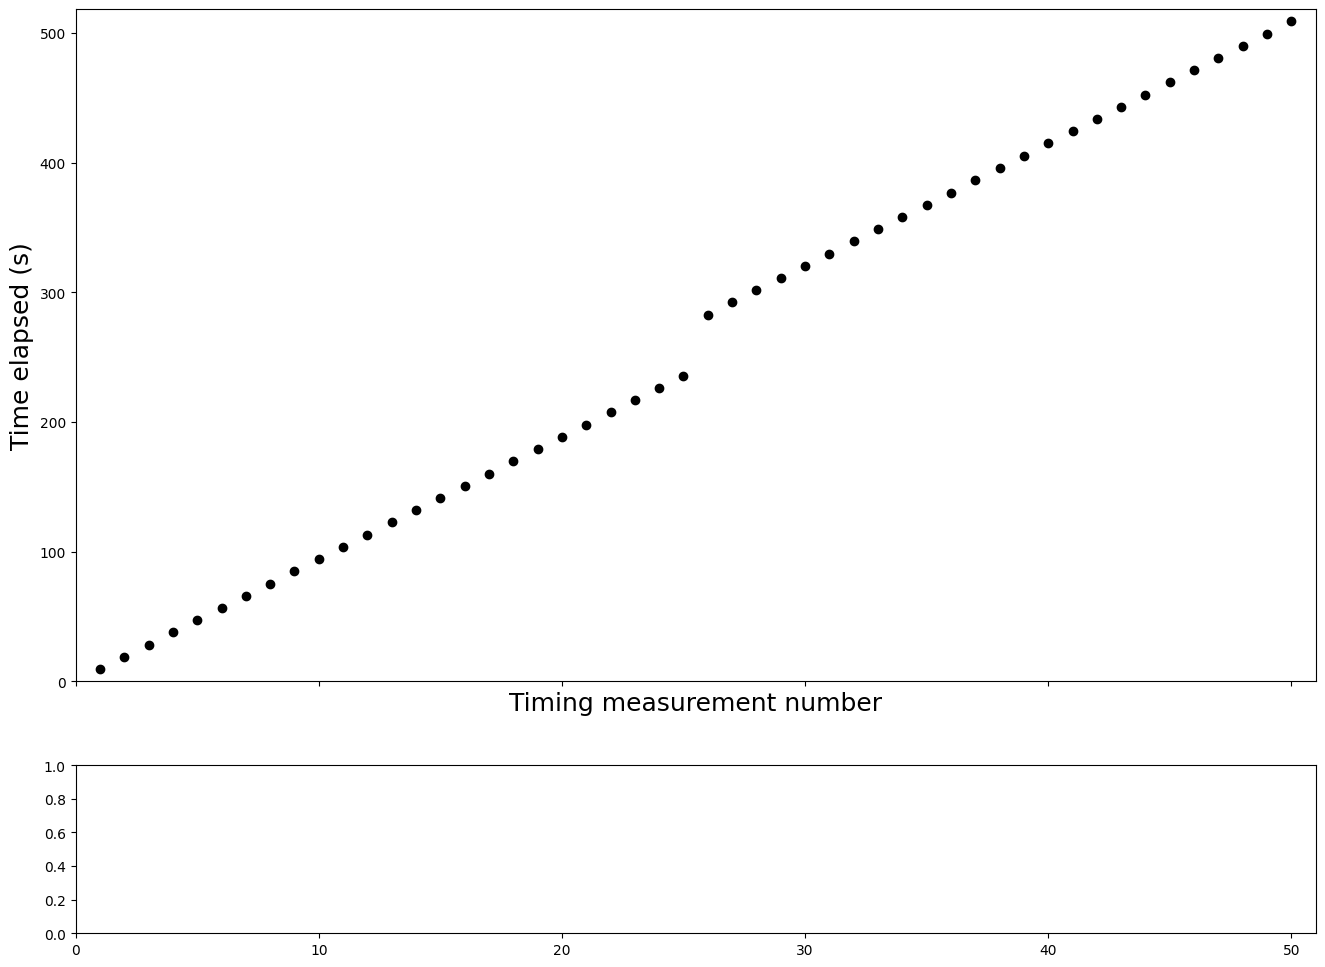

In [24]:
data0 = read_data('villads_time.dat')
data1 = read_data('magnus_timer.dat')
data2 = read_data('Chris_time.dat')
n, t = data0['n'], data0['t_s']


# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [31]:
data = [data0, data1, data2]

def fit(N, a, b, c):
    return np.where(N > 25, a * N + b + c, a * N + b)

# for data_item in data:

mfit0 = cost.LeastSquares(data0['n'], data0['t_s'], 1.0, fit)
mfit0 = Minuit(mfit0, a=10, b=0, c = 4)
mfit0.migrad()

# print(mfit.values['c']/mfit.values['a'])

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1463 (χ²/ndof = 0.0)     │              Nfcn = 59               │
│ EDM = 1.13e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.428   │   0.020   │            │            │         │         │       │
│ 1 │ b    │   -0.03   │   0.32    │            │            │         │         │       │
│ 2 │ c    │   37.7    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 0.000385  -5.0e-3  -9.6e-3 │
│ b │  -5.0e-3    0.105     0.09 │
│ c │  -9.6e-3     0.09     0.32 │
└───┴────────────────────────────┘

In [32]:
mfit1 = cost.LeastSquares(data1['n'], data1['t_s'], 1.0, fit)
mfit1 = Minuit(mfit1, a=10, b=0, c = 4)
mfit1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.04832 (χ²/ndof = 0.0)    │              Nfcn = 61               │
│ EDM = 4.35e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.425   │   0.020   │            │            │         │         │       │
│ 1 │ b    │   -0.15   │   0.32    │            │            │         │         │       │
│ 2 │ c    │   37.7    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 0.000385  -5.0e-3  -9.6e-3 │
│ b │  -5.0e-3    0.105     0.08 │
│ c │  -9.6e-3     0.08     0.32 │
└───┴────────────────────────────┘

In [27]:
mfit2 = cost.LeastSquares(data2['n'], data2['t_s'], 1.0, fit)
mfit2 = Minuit(mfit2, a=10, b=0, c = 4)
mfit2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.08319 (χ²/ndof = 0.0)    │              Nfcn = 59               │
│ EDM = 8.32e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.427   │   0.020   │            │            │         │         │       │
│ 1 │ b    │   -0.04   │   0.32    │            │            │         │         │       │
│ 2 │ c    │   37.7    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 0.000385  -5.0e-3  -9.6e-3 │
│ b │  -5.0e-3    0.105     0.09 │
│ c │  -9.6e-3     0.09     0.32 │
└───┴────────────────────────────┘